Data loaded successfully. Shape: (200, 5)

--- Initial Data Information ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None

No missing values detected.

Dropped 'CustomerID' column.

Converted 'Gender' to numerical format (Label Encoding).

--- Handling Outliers ---
Outliers detected: 0 rows.
Outliers removed. New shape: (200, 4)

Scaled numerical features using StandardScaler.

--- Correlation Matrix ---


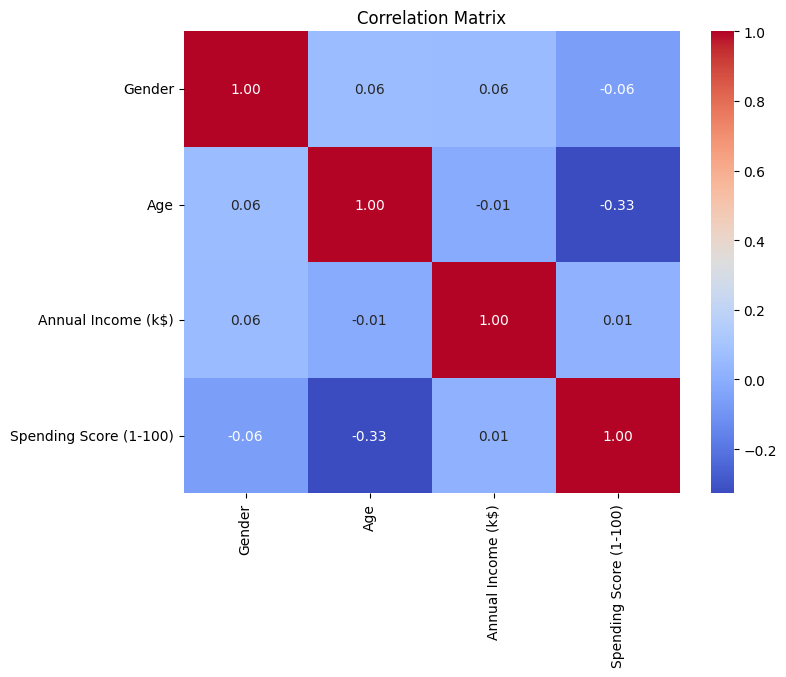


--- First 5 Rows of Preprocessed Data ---
   Gender       Age  Annual Income (k$)  Spending Score (1-100)
0       1 -1.424569           -1.738999               -0.434801
1       1 -1.281035           -1.738999                1.195704
2       0 -1.352802           -1.700830               -1.715913
3       0 -1.137502           -1.700830                1.040418
4       0 -0.563369           -1.662660               -0.395980

--- Summary of Preprocessed Data ---
Shape of dataset: (200, 4)
Summary statistics:
           Gender           Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  2.000000e+02        2.000000e+02            2.000000e+02
mean     0.440000 -1.021405e-16       -2.131628e-16           -1.465494e-16
std      0.497633  1.002509e+00        1.002509e+00            1.002509e+00
min      0.000000 -1.496335e+00       -1.738999e+00           -1.910021e+00
25%      0.000000 -7.248436e-01       -7.275093e-01           -5.997931e-01
50%      0.000000 -2.045351e-01 

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
import numpy as np
from scipy.stats import zscore
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("data.csv")
print("Data loaded successfully. Shape:", df.shape)

# Validate the dataset
print("\n--- Initial Data Information ---")
print(df.info())

# Check for missing values
if df.isnull().values.any():
    print("\nWarning: Dataset contains missing values. Handling missing data...")
    print("Missing values count per column:")
    print(df.isnull().sum())
    # Handling missing values (drop rows with missing data)
    df = df.dropna()
    print("Missing values removed. New shape:", df.shape)
else:
    print("\nNo missing values detected.")

# Drop unnecessary columns
if 'CustomerID' in df.columns:
    df = df.drop('CustomerID', axis=1)
    print("\nDropped 'CustomerID' column.")

# Encode categorical column: Gender
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
print("\nConverted 'Gender' to numerical format (Label Encoding).")

# Handle outliers using Z-score
numerical_features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
print("\n--- Handling Outliers ---")
z_scores = np.abs(zscore(df[numerical_features]))
threshold = 3  # Common threshold for Z-score
outliers = (z_scores > threshold).any(axis=1)
print(f"Outliers detected: {outliers.sum()} rows.")
df = df[~outliers]
print("Outliers removed. New shape:", df.shape)

# Scale numerical features
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])
print("\nScaled numerical features using StandardScaler.")

# Check correlations between features
print("\n--- Correlation Matrix ---")
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# Save preprocessed dataset
df.to_csv("predata.csv", index=False)

# Print sample of preprocessed data
print("\n--- First 5 Rows of Preprocessed Data ---")
print(df.head())

# Print summary of the dataset
print("\n--- Summary of Preprocessed Data ---")
print("Shape of dataset:", df.shape)
print("Summary statistics:")
print(df.describe())